## import libraries

In [55]:
import pandas as pd
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

### exploratory

In [56]:
df_train = pd.read_csv("data/leukemia/ALLAML_train.csv", header=None, names=[i for i in range(7130)], index_col=False)

In [57]:
df_test = pd.read_csv("data/leukemia/ALLAML_test.csv", header=None, names=[i for i in range(7130)], index_col=False)

In [58]:
df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
0,-72,-139,-1,392,-324,-510,-350,-202,249,561,...,1121,102,330,-112,1567,627,21,2520,0,-1
1,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,1
2,-318,-192,-95,312,-139,-344,324,-237,105,167,...,737,63,472,33,737,227,-9,371,-31,-1
3,-67,-93,84,25,-179,-323,-135,-127,-2,-66,...,224,60,194,-10,291,41,8,-2,-80,1
4,-476,-213,-18,301,-403,-394,-42,-144,98,173,...,1215,127,255,50,1701,1109,61,526,-83,1


### get features, labels

In [59]:
feature_train=df_train.iloc[:,:-1]
feature_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,-72,-139,-1,392,-324,-510,-350,-202,249,561,...,103,1121,102,330,-112,1567,627,21,2520,0
1,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
2,-318,-192,-95,312,-139,-344,324,-237,105,167,...,225,737,63,472,33,737,227,-9,371,-31
3,-67,-93,84,25,-179,-323,-135,-127,-2,-66,...,48,224,60,194,-10,291,41,8,-2,-80
4,-476,-213,-18,301,-403,-394,-42,-144,98,173,...,241,1215,127,255,50,1701,1109,61,526,-83


In [60]:
feature_test=df_test.iloc[:,:-1]
feature_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
1,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
2,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
3,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
4,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


In [61]:
target_train=df_train.iloc[:,-1:]
target_train.head(5)

,7129
0,-1
1,1
2,-1
3,1
4,1


In [62]:
target_test=df_test.iloc[:,-1:]
target_test.head(5)

,7129
0,1
1,1
2,1
3,1
4,1


In [63]:
x_trainset=feature_train.values
x_trainset.shape

(38, 7129)

In [64]:
x_testset=feature_test.values
x_testset[:5]

array([[-342, -200,   41, ...,   48,  168,  -70],
       [ -87, -248,  262, ...,  -33,  -33,  -21],
       [  22, -153,   17, ...,    6, 1971,  -42],
       [-243, -218, -163, ...,    0,  510,  -73],
       [-130, -177,  -28, ...,   29,  333,  -19]], dtype=int64)

In [65]:
y_trainset=target_train.values
y_trainset.shape

(38, 1)

In [66]:
y_testset=target_test.values
y_testset

array([[ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1]], dtype=int64)

### training

In [67]:
class Perceptron:
    def __init__ (self):
        self.w = None
        self.b = None
    
  #model  
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else -1
  
  #predictor to predict on the data based on w
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 100, lr = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy = {}
        max_accuracy = 0
        wt_matrix = []
    #for all epochs
        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == -1:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == -1 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1
          
            wt_matrix.append(self.w)    
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                j = i
                chkptw = self.w
                chkptb = self.b
                
        
    #checkpoint (Save the weights and b value)
        self.w = chkptw
        self.b = chkptb
        
        print(max_accuracy,j)
    #plot the accuracy values over epochs
        plt.plot(np.array(list(accuracy.values())).astype(float))
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()
    
    #return the weight matrix, that contains weights over all epochs
        return np.array(wt_matrix)

1.0 4


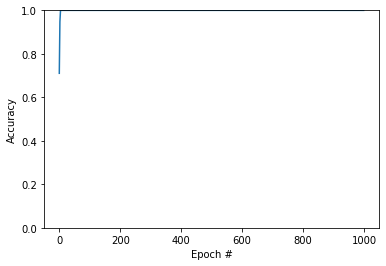

In [68]:
perceptron = Perceptron()
#epochs = 1000 and lr = 0.3
wt_matrix = perceptron.fit(x_trainset, y_trainset, 1000, 0.3)
#making predictions on test data
Y_pred_test = perceptron.predict(x_testset)

### evaluate

In [69]:
#checking the accuracy of the model
print(accuracy_score(Y_pred_test, y_testset))
print(confusion_matrix(y_testset, Y_pred_test))

0.7941176470588235
[[ 7  7]
 [ 0 20]]
